In [2]:
import sys
import os
import dolfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sys.path.append(os.getcwd()[:-6])

In [8]:
from src.model import PerfusionGasExchangeModel
from src.params import params
params

{'kappa': 1.5751302,
 'mu': 2.625217e-05,
 'p_max': 12,
 'p_min': 8,
 'd_pla_O2': 1620.0,
 'd_ba_O2': 1000.0000000000001,
 'd_pla_CO2': 1000.0000000000001,
 'd_ba_CO2': 914.0000000000001,
 'beta_O2': 1.269e-21,
 'k_O2': 20,
 'k_prime_O2': 2.85e+21,
 'beta_CO2': 2.5380000000000002e-20,
 'k_CO2': 500000000.0,
 'k_prime_CO2': 1e+18,
 'h_ba': 0.3,
 'p_air_O2': 100,
 'p_air_CO2': 40,
 'p_O2_in': 40,
 'p_CO2_in': 45,
 'c_t': 2.4e-17,
 'c_HbO2_in': 2e-17,
 'c_HbCO2_in': 6.4e-22}

In [13]:
folder = "test-09"
path = os.path.join("../raw-data", folder)

In [14]:
model = PerfusionGasExchangeModel(folder_path=path, params=params)
model.generate_slab_mesh(
    dims=(300, 6, 300), elems=(2, 1, 1), save=True, periodic=True
)
model.set_u(value=(400, 0, 0), save=True)
x = model.sim_sbst(hb=False, save=False)
solution = model.sim_sbst(hb=True, save=True, guess=x)
boundaries = dolfin.File(model.folder_path+'/bnd/bnd.pvd')
boundaries << model.boundaries

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.696e+10 (tol = 1.000e-08) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 7.056e-06 (tol = 1.000e-08) r (rel) = 4.161e-16 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.137e+12 (tol = 1.000e-08) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.000e+10 (tol = 1.000e-08) r (rel) = 2.639e-02 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 2.107e+08 (tol = 1.000e-08) r (rel) = 1.853e-04 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 2.613e+04 (tol = 1.000e-08) r (rel) = 2.298e-08 (tol = 1.000e-09)
  Newton iteration 

In [5]:
# v = model.avg_field_along_dir(solution.split()[2], 10)

In [4]:
dfpo2 = pd.read_csv("p_O2.csv")
dfpco2 = pd.read_csv("p_CO2.csv")
dfchbo2 = pd.read_csv("c_HbO2.csv")
dfchbco2 = pd.read_csv("c_HbCO2.csv")

In [5]:
dfpo2_mean = dfpo2.groupby(['Points:0'], as_index=False).mean(["p_O2"])
dfpco2_mean = dfpco2.groupby(['Points:0'], as_index=False).mean(["p_CO2"])
dfchbo2_mean = dfchbo2.groupby(['Points:0'], as_index=False).mean(["c_HbO2"])
dfchbco2_mean = dfchbco2.groupby(['Points:0'], as_index=False).mean(["c_HbCO2"])

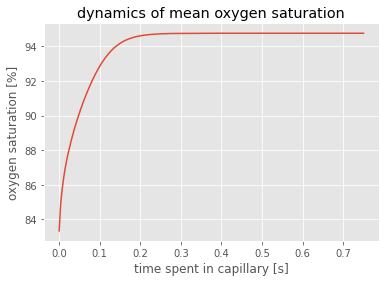

In [24]:
plt.figure()
plt.title("dynamics of mean oxygen saturation")
plt.ylabel("oxygen saturation [%]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfchbo2_mean["Points:0"]/400,
    100*dfchbo2_mean["c_HbO2"]/params["c_t"]
)
plt.savefig('mean_sat.pdf')

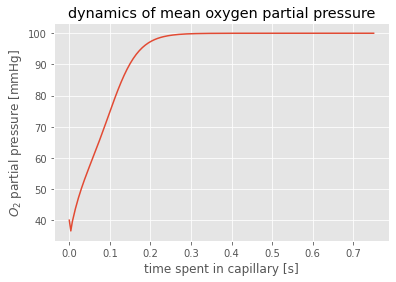

In [25]:
plt.figure()
plt.title("dynamics of mean oxygen partial pressure")
plt.ylabel(r"$O_2$ partial pressure [mmHg]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfpo2_mean["Points:0"]/400,
    dfpo2_mean["p_O2"]
)
plt.savefig('mean_po2.pdf')

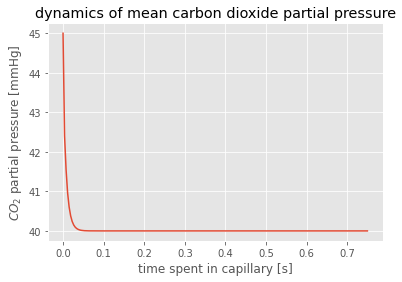

In [26]:
plt.figure()
plt.title("dynamics of mean carbon dioxide partial pressure")
plt.ylabel(r"$CO_2$ partial pressure [mmHg]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfpco2_mean["Points:0"]/400,
    dfpco2_mean["p_CO2"]
)
plt.savefig('mean_pco2.pdf')

In [12]:
dfpo2_cent = pd.read_csv("p_O2_cent.csv")
dfpco2_cent = pd.read_csv("p_CO2_cent.csv")
dfchbo2_cent = pd.read_csv("c_HbO2_cent.csv")
dfchbco2_cent = pd.read_csv("c_HbCO2_cent.csv")
dfpo2_quar = pd.read_csv("p_O2_quar.csv")
dfpco2_quar = pd.read_csv("p_CO2_quar.csv")
dfchbo2_quar = pd.read_csv("c_HbO2_quar.csv")
dfchbco2_quar = pd.read_csv("c_HbCO2_quar.csv")
dfpo2_top = pd.read_csv("p_O2_top.csv")
dfpco2_top = pd.read_csv("p_CO2_top.csv")
dfchbo2_top = pd.read_csv("c_HbO2_top.csv")
dfchbco2_top = pd.read_csv("c_HbCO2_top.csv")

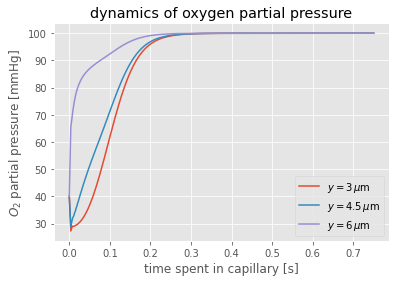

In [27]:
plt.figure()
plt.title("dynamics of oxygen partial pressure")
plt.ylabel(r"$O_2$ partial pressure [mmHg]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfpo2_cent["Points:0"]/400,
    dfpo2_cent["p_O2"], label=r"$y = 3 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpo2_quar["Points:0"]/400,
    dfpo2_quar["p_O2"], label=r"$y = 4.5 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpo2_top["Points:0"]/400,
    dfpo2_top["p_O2"], label=r"$y = 6 \, \mu \mathrm{m}$"
)
plt.legend()
plt.savefig('po2.pdf')

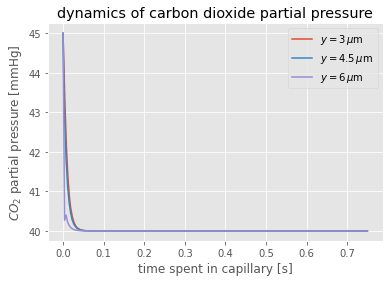

In [28]:
plt.figure()
plt.title("dynamics of carbon dioxide partial pressure")
plt.ylabel(r"$CO_2$ partial pressure [mmHg]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfpco2_cent["Points:0"]/400,
    dfpco2_cent["p_CO2"], label=r"$y = 3 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpco2_quar["Points:0"]/400,
    dfpco2_quar["p_CO2"], label=r"$y = 4.5 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpco2_top["Points:0"]/400,
    dfpco2_top["p_CO2"], label=r"$y = 6 \, \mu \mathrm{m}$"
)
plt.legend()
plt.savefig('pco2.pdf')

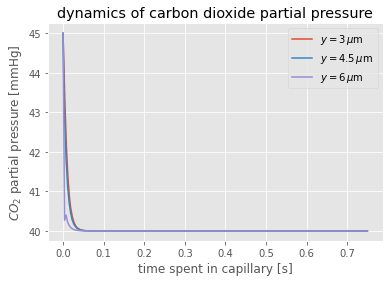

In [15]:
plt.figure()
plt.title("dynamics of carbon dioxide partial pressure")
plt.ylabel(r"$CO_2$ partial pressure [mmHg]")
plt.xlabel("time spent in capillary [s]")
plt.plot(
    dfpco2_cent["Points:0"]/400,
    dfpco2_cent["p_CO2"], label=r"$y = 3 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpco2_quar["Points:0"]/400,
    dfpco2_quar["p_CO2"], label=r"$y = 4.5 \, \mu \mathrm{m}$"
)
plt.plot(
    dfpco2_top["Points:0"]/400,
    dfpco2_top["p_CO2"], label=r"$y = 6 \, \mu \mathrm{m}$"
)
plt.legend()
plt.show()